**Projeto - Tópicos IF807 - Responsible AI**

**Grupo:**

- Felipe Neiva
- Mader Gabriel
- Rubens Lima

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

C:\Users\rubin\AppData\Local\Temp\ipykernel_43156\3198430283.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Lendo o Dataset**

In [2]:
import os

git_file = 'https://raw.githubusercontent.com/rubdelima/IF-807---PL-Predict-Matches/main/Premier_League.csv'
file = git_file if len(los := [i for i in os.listdir() if i.endswith(".csv")]) < 1 else los[0]

df = pd.read_csv(file)
df.head()

,date,clock,stadium,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,...,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
0,28th May 2023,4:30pm,Emirates Stadium,"60,095",Arsenal,5,Wolverhampton Wanderers,0,51.0,49.0,...,52.2,0,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...
1,28th May 2023,4:30pm,Villa Park,"42,212",Aston Villa,2,Brighton and Hove Albion,1,40.3,59.7,...,47.8,3,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...
2,28th May 2023,4:30pm,Gtech Community Stadium,"17,120",Brentford,1,Manchester City,0,34.4,65.6,...,50.0,2,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...
3,28th May 2023,4:30pm,Stamford Bridge,"40,130",Chelsea,1,Newcastle United,1,64.4,35.6,...,45.5,3,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...
4,28th May 2023,4:30pm,Selhurst Park,"25,198",Crystal Palace,1,Nottingham Forest,1,66.0,34.0,...,41.7,3,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...


In [3]:
file

'Premier_League.csv'

In [4]:
df["home_victory"] = df.apply(lambda row : True if row['Goals Home'] > row['Away Goals'] else False, axis=1 )
df["pass_percentage"] = df.apply(lambda row : row["home_pass"]/ (row["home_pass"]+row["away_pass"]), axis=1 )
df["chances_percentage"] = df.apply(lambda row : 0 if (row["home_chances"]+row["away_chances"]) == 0 else row["home_chances"]/ (row["home_chances"]+row["away_chances"]), axis=1 )

Aqui dropamos as colunas que são menos relevantes para a análise e fizemos uma análise exploratória dos dados.

Chegamos a testar previamente alguns modelos com o público da partida como variável também, mas não obtivemos bons resultados, entáo decidimos remover. Fora isso, removemos variáveis que facilitariam muito como Goals Home e Goals Away, pois queremos prever o resultado do jogo baseado nas estatísticas dele.

In [5]:
unused_columns = ["Goals Home", "Away Goals", "attendance", "date", "clock", "stadium", "Home Team", "Away Team", "links"]

df = df.drop(unused_columns, axis=1)

df.head()

,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,home_off,away_off,home_blocked,away_blocked,...,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,home_victory,pass_percentage,chances_percentage
0,51.0,49.0,14,6,8,0,4,4,2,2,...,3,8,11,0,0,0,0,True,0.502825,1.000000
1,40.3,59.7,12,8,5,4,5,3,2,1,...,3,15,16,4,4,0,0,True,0.473883,0.571429
2,34.4,65.6,11,17,4,3,4,6,3,8,...,3,12,8,4,0,0,0,True,0.468953,0.666667
3,64.4,35.6,22,13,5,4,9,5,8,4,...,5,9,11,0,0,0,0,False,0.516260,0.500000
4,66.0,34.0,15,7,3,4,8,2,4,1,...,2,9,13,0,2,0,0,False,0.550771,1.000000


**Separando os conjuntos de teste e treinamento**

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['home_victory'])
Y = df['home_victory']

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_set = {}
for i in (4,5,6):
   for j in (20, 25, 30, 35, 40):
    dt_set[(i,j)] = {"dt" : DecisionTreeClassifier(criterion = 'entropy',max_depth = i,min_samples_leaf = j)}
    dt_set[(i,j)]["dt"].fit(X_train, Y_train)
    dt_set[(i,j)]["accuracy"] = accuracy_score(Y_test,dt_set[(i,j)]["dt"].predict(X_test))

for k in dt_set.keys():
  print(k, dt_set[k]["accuracy"])


(4, 20) 0.6210526315789474
(4, 25) 0.6421052631578947
(4, 30) 0.6736842105263158
(4, 35) 0.6421052631578947
(4, 40) 0.6421052631578947
(5, 20) 0.6210526315789474
(5, 25) 0.5894736842105263
(5, 30) 0.6736842105263158
(5, 35) 0.6421052631578947
(5, 40) 0.6421052631578947
(6, 20) 0.6210526315789474
(6, 25) 0.6210526315789474
(6, 30) 0.6736842105263158
(6, 35) 0.6421052631578947
(6, 40) 0.6421052631578947


In [8]:
# Vamos agora selecionar os resultados com maior acurácia

# Selecionado a maior acurácia
dt_max = max(
    [x["accuracy"] for x in dt_set.values()]
  )

# Envontrando os paresq eu tiveram essa acurácia
bests_dts = [x["dt"] for x in dt_set.values() if x["accuracy"] == dt_max]

# Separando por max_depth
bests_dts_dict = {}
for dt in bests_dts:
  if dt.max_depth in bests_dts_dict.keys():
    # Vou só alternar para ter mais variância no número de samples (e diretamenta ma maior profundidade)
    if (dt.max_depth%2)^(dt.min_samples_leaf > bests_dts_dict[dt.max_depth].min_samples_leaf):
      continue
  bests_dts_dict[dt.max_depth] = dt

bests_dts = list(bests_dts_dict.values())

len(bests_dts)

3

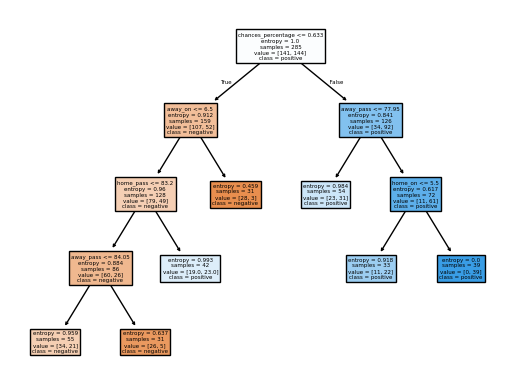

In [9]:
from sklearn import tree

tree.plot_tree(bests_dts[0], feature_names = X.columns, class_names=['negative', "positive"],filled = True);


Acurácia dos dados de teste  :  0.6736842105263158


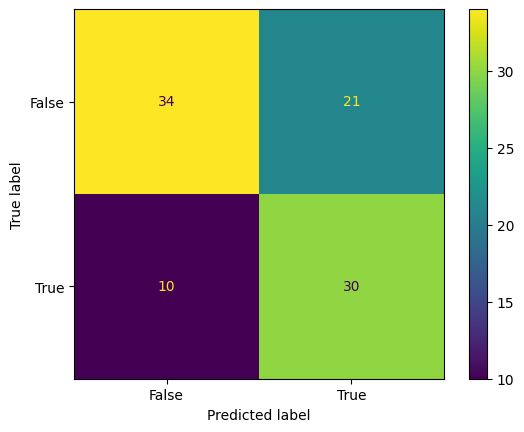

In [10]:
dt = bests_dts[0]

from sklearn.metrics import accuracy_score

Yhat = dt.predict(X_test)

print("Acurácia dos dados de teste  : ", accuracy_score(Y_test,Yhat))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Displaying the confusion matrix

cm = confusion_matrix(Y_test, Yhat, labels=dt.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)

disp.plot()

plt.show()

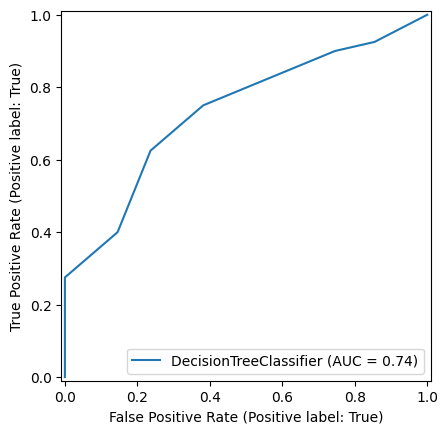

In [11]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(dt, X_test, Y_test)

Na decision Tree, obtivemos uma acurácia máxima nos dados de teste de 0.76.

### Random Forest

In [12]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, max_features = 3)

rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=3, n_estimators=200)

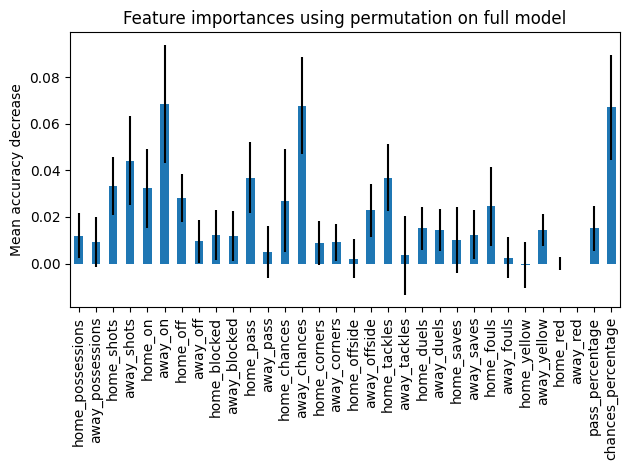

In [13]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, Y_test,n_repeats=30, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

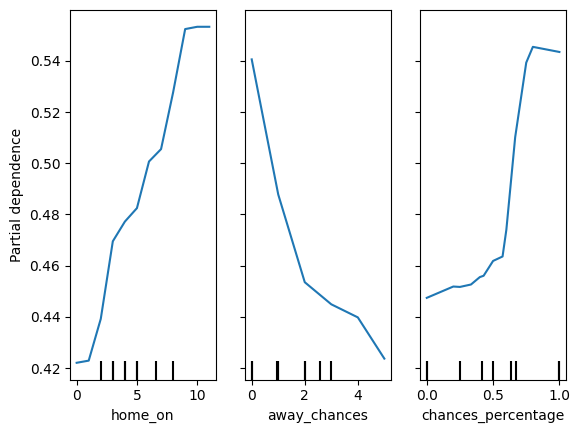

In [14]:
from sklearn.inspection import PartialDependenceDisplay

disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [4, 13, 31],grid_resolution=20)

In [15]:
from sklearn.metrics import accuracy_score

Yhat = rf.predict(X_test)

print("Acurácia dos dados de teste  : ", accuracy_score(Y_test,Yhat))

Acurácia dos dados de teste  :  0.7789473684210526


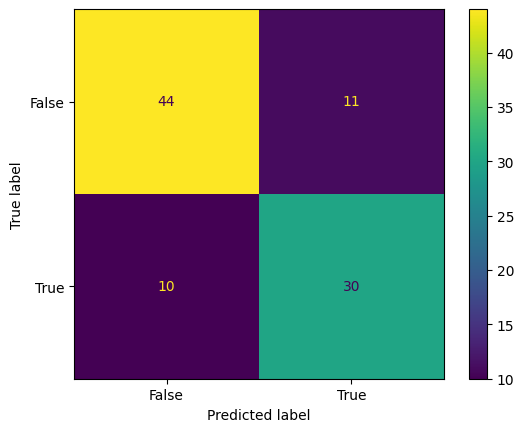

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Displaying the confusion matrix

cm = confusion_matrix(Y_test, Yhat, labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

disp.plot()

plt.show()

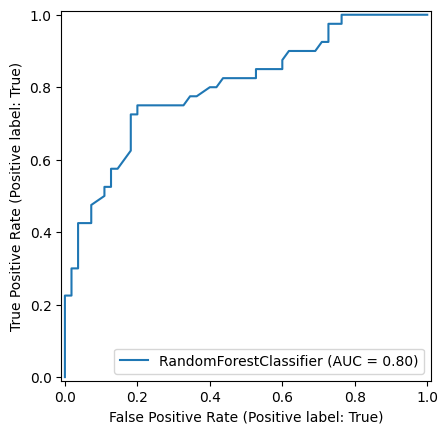

In [17]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf, X_test, Y_test)

Na Random Forest, obtivemos uma acurácia máxima nos dados de teste de 0.68.

### KNN

In [18]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

Yhat_knn = knn.predict(X_test)

print("Acurácia dos dados de teste (knn) : ", accuracy_score(Y_test,Yhat_knn))


Acurácia dos dados de teste (knn) :  0.5578947368421052


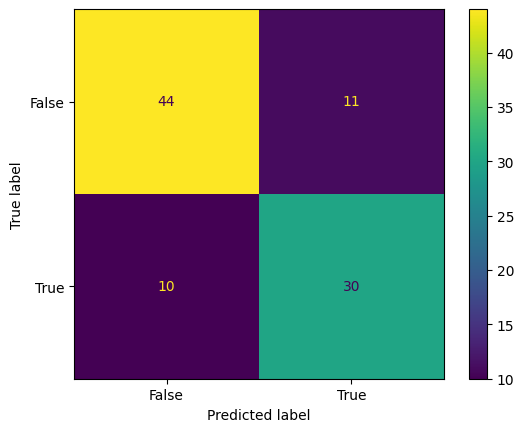

In [19]:
cm = confusion_matrix(Y_test, Yhat, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)

disp.plot()

plt.show()

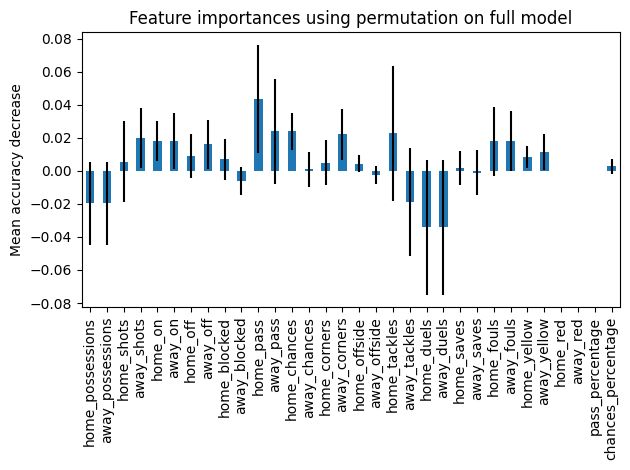

In [20]:
result = permutation_importance(knn, X_test, Y_test,n_repeats=30, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

No KNN tivemos nossa pior acurácia, 0.61

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)

Yhat_lr = lr.predict(X_test)

accuracy = accuracy_score(Y_test, Yhat_lr)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.91


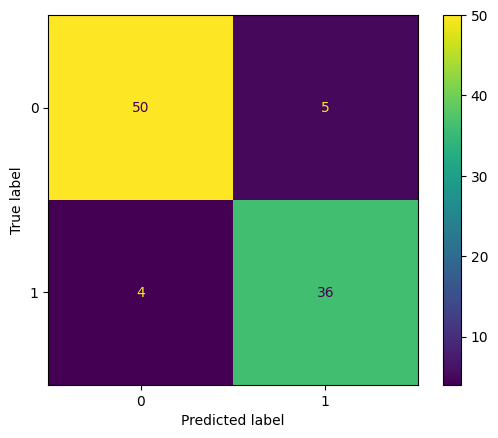

In [25]:
cm = confusion_matrix(Y_test, Yhat_lr, labels=lr.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)

disp.plot()

plt.show()

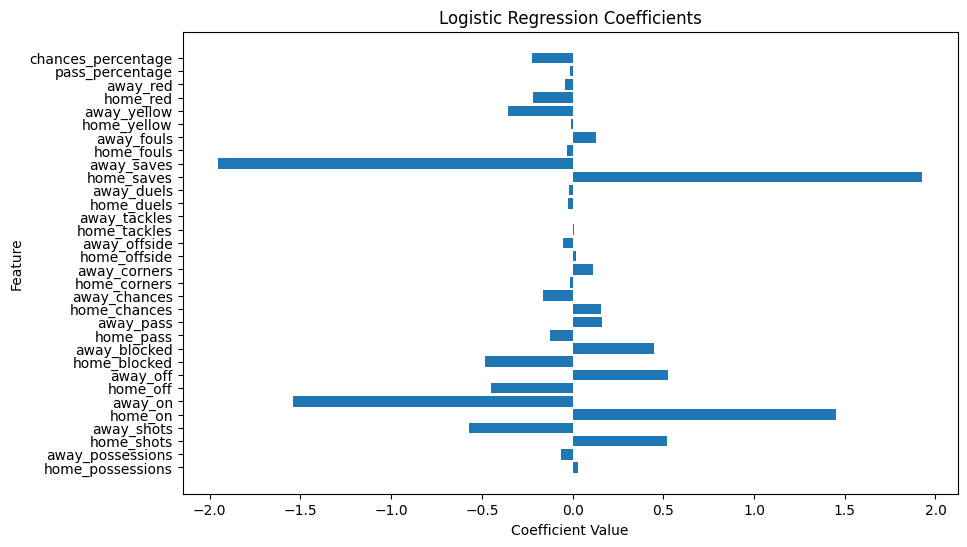

In [22]:
features = X.columns
coefficients = lr.coef_[0]

plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

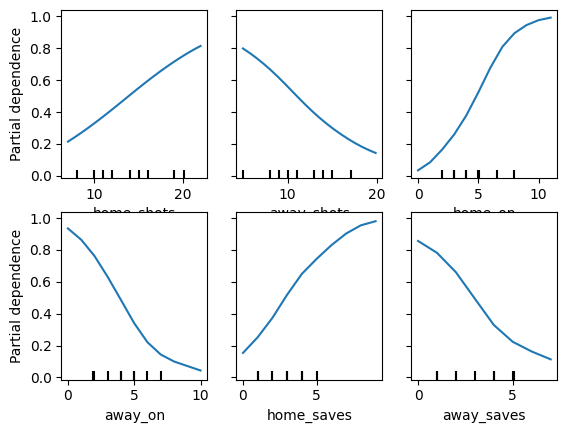

In [23]:
from sklearn.inspection import PartialDependenceDisplay

disp1 = PartialDependenceDisplay.from_estimator(lr, X_test, [2,3,4, 5, 22, 23],grid_resolution=20)

Na regressão logística, obtivemos o melhor resultado, com uma acurácia 0.88.

### Conslusões

- A regressão logística foi o modelo que obteve o melhor resultado o que pode ser explicado pela simplicidade do modelo, visto que existem relacões teoricamente lineares entre as variáveis e o resultado da partida.

- A Decision Tree e Random Forest tiveram resultados próximos, mas inferiores ao da regressão logística, por serem modelos lineares.

- O KNN foi o modelo que obteve o pior resultado, o que pode ter relação com a variedade das instâncias, visto que o KNN é um modelo que se baseia na distância entre os pontos.

- A acurácia dos modelos foi relativamente baixa, o que pode ser explicado pela complexidade do problema, visto que Futebol é um esporte difícil de se prever apenas em estatísticas.

- As variáveis mais importantes para a previsão do resultado do jogo em geral foram as variáveis de chutes a gol do time da casa, chutes do time da casa, porcentagem de chances do time da casa, defesas do time da casa e visitante e chances do time visitante.

- As variáveis menos importantes em geral foram as de desarmes e cartões, dependendo do modelo. No KNN as variáveis mais importantes foram bastante diferentes dos outros modelos, o que pode explicar sua baixa acurácia.




**Exemplo da diferença de linearidade entre a Regressão Logística e a Random Forest**

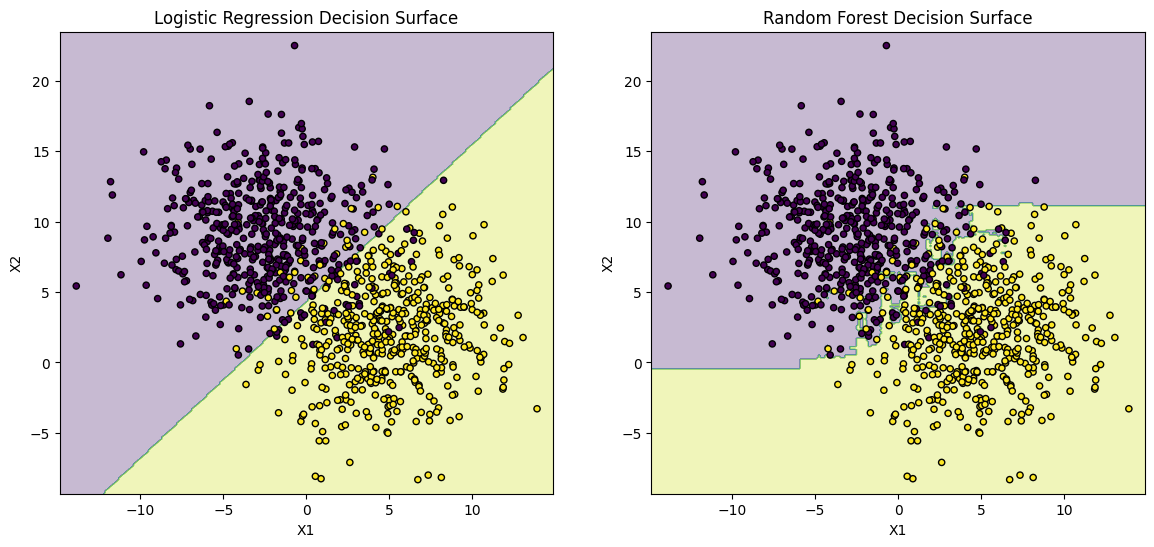

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Gerar dados de exemplo
X, y = make_blobs(n_samples=1000, centers=2, random_state=42, cluster_std=3.5)

# Treinar os modelos
lr = LogisticRegression()
lr.fit(X, y)

rf = RandomForestClassifier()
rf.fit(X, y)

# Criar uma grade de pontos
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Prever a classe de cada ponto na grade usando Regressão Linear
Z_lr = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lr = Z_lr.reshape(xx.shape)

# Prever a classe de cada ponto na grade usando Floresta Aleatória
Z_rf = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rf = Z_rf.reshape(xx.shape)

# Desenhar a superfície de decisão
plt.figure(figsize=(14, 6))

# Gráfico da Regressão Linear
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_lr, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.title('Logistic Regression Decision Surface')
plt.xlabel('X1')
plt.ylabel('X2')

# Gráfico da Floresta Aleatória
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_rf, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.title('Random Forest Decision Surface')
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()


## Confiabilidade dos Modelos

Assumindo nosso modelo ideal como o de Regressão Logística, notamos que temos as seguintes métricas paraconfiabilidade do modelo

In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Yhat_lr))

              precision    recall  f1-score   support

       False       0.93      0.91      0.92        55
        True       0.88      0.90      0.89        40

    accuracy                           0.91        95
   macro avg       0.90      0.90      0.90        95
weighted avg       0.91      0.91      0.91        95

